In [1]:
import numexpr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
def fmt_items(lines,max_lines=0):
    max_width=max([len(line)for line in lines])
    empty =' '*max_width
    lines = [line.ljust(max_width)for line in lines]
    lines += [empty]*(max_lines - len(lines))
    return lines
def pp (*list):
    lines = [ str(item).split('\n') for item in list]
    max_lines=max([len(item)for  item in lines])
    lines = [fmt_items(item,max_lines=max_lines)for item in lines]
    lines_t= np.array(lines).T
    print('\n'.join([' '.join(line) for  line in lines_t]))

# Vizualization Seattle Bicycle Counts

In [2]:
%matplotlib inline
import seaborn; seaborn.set()
data = pd.read_csv('statick/FremontBridge.csv',index_col='Date', parse_dates=True)
data.columns = ['east','west']
data['total']= data.eval('east + west')

In [11]:
data.head()

,east,west,total
Date,,,
2015-02-24 02:00:00,3.0,3.0,6.0
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2016-02-15 00:00:00,3.0,3.0,6.0
2019-01-01 02:00:00,1.0,11.0,12.0


In [12]:
data.describe()

,east,west,total
count,59079.000000,59079.000000,59079.000000
mean,52.382539,59.590125,111.972664
std,67.631882,86.871875,141.984104
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,72.000000,146.000000
max,698.000000,850.000000,1097.000000


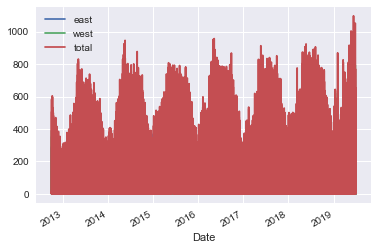

In [60]:
data.plot()

In [39]:
data.resample('W').get_group('2012-10-07''2012-11-07')

AttributeError: 'str' object has no attribute '_take'

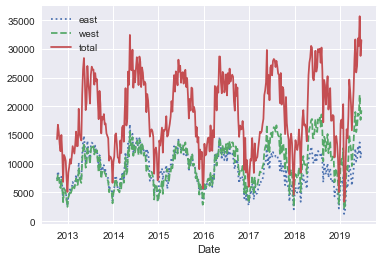

In [11]:
weekly = data.resample('W').sum()
# print(data.sum())
weekly.plot(style=[':','--','-'])


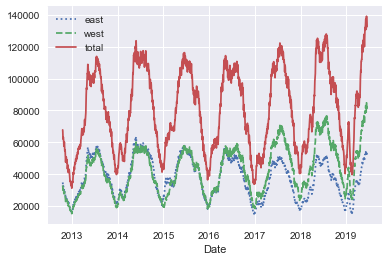

In [16]:
daily = data.resample('D').sum()
daily.rolling(30, center= True).sum().plot(style =[':','--','-'])

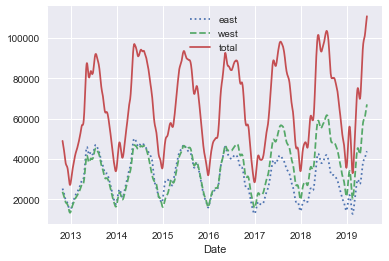

In [45]:
daily.rolling(50, center = True, win_type = 'gaussian').sum (std = 10).plot(style = [':','--','-'])

In [63]:
daily.rolling(500, center= True).__bytes__

<bound method StringMixin.__bytes__ of Rolling [window=500,center=True,axis=0]>

In [50]:
daily.rolling(30, center= True, win_type = 'gaussian').plot(style = [':','--','-'])

AttributeError: 'Window' object has no attribute 'plot'

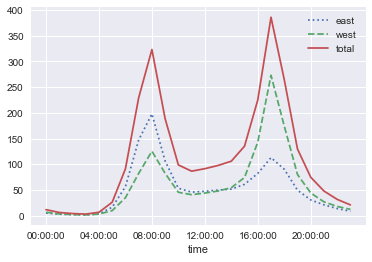

In [7]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60* np.arange(6)
by_time.plot(xticks = hourly_ticks,style=[':','--','-'])

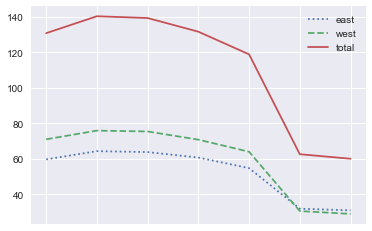

In [85]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['mon','tus','wen','thu','fri','sat','sun']
by_weekday.plot(style = [':','--','-'])

In [52]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()*100

In [53]:
print(by_time.loc['Weekday'])

                  east          west         total
00:00:00    426.734926    553.071672    979.806598
01:00:00    222.241183    260.295791    482.536974
02:00:00    162.343572    162.400455    324.744027
03:00:00    144.596132    131.058020    275.654152
04:00:00    429.010239    339.249147    768.259386
05:00:00   2129.237770   1235.153584   3364.391354
06:00:00   7561.945392   4530.716724  12092.662116
07:00:00  19934.300341  10889.249147  30823.549488
08:00:00  26436.518771  16422.525597  42859.044369
09:00:00  13145.987479   9991.291975  23137.279454
10:00:00   5317.074559   4549.686966   9866.761525
11:00:00   3921.172453   3481.787137   7402.959590
12:00:00   3917.871372   3701.252134   7619.123506
13:00:00   4132.878271   4098.009101   8230.887372
14:00:00   4366.723549   4964.675768   9331.399317
15:00:00   5724.857793   7762.002275  13486.860068
16:00:00   8926.905575  17576.507395  26503.412969
17:00:00  13665.244596  36182.195677  49847.440273
18:00:00  10976.678043  22840.2

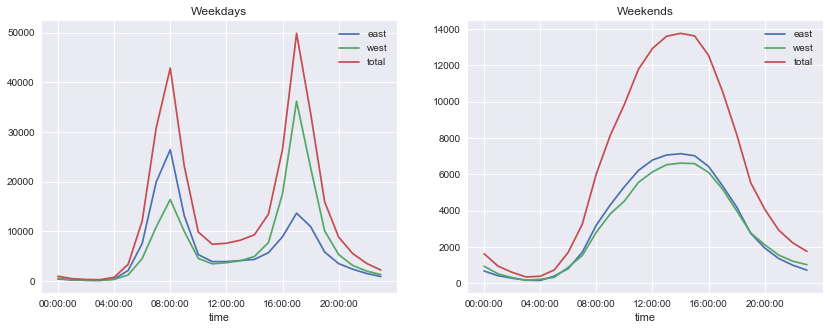

In [61]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0],xticks= hourly_ticks,title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1],xticks= hourly_ticks,title='Weekends')

## query() and evel()

In [12]:
rng = np.random.RandomState(42)
df1,df2,df3,df4,df5 = (pd.DataFrame(rng.randint(0,1000,(100,3))) for i in range(5))
x = rng.rand(int(1E6))
y = rng.rand(int(1E6))


In [8]:
%timeit x+y

6.3 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit np.fromiter((i+j for i,j in zip(x,y)),dtype=x.dtype,count = len(x))

397 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit mask = (x>0.5) & (y<0.5)

3.45 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit mask_numexpr= numexpr.evaluate('(x >0.5) & (y<0.5)')
np.allclose(mask,mask_numexpr)

7.16 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


True

In [23]:
nrows,ncols = 10000,100
df1,df2,df3,df4 = (pd.DataFrame(rng.rand(nrows,ncols)) for i in range(4))

In [26]:
%timeit df1+df2+df3+df4

21.4 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%timeit pd.eval('df1+df2+df3+df4')

15.3 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
df1,df2,df3,df4,df5 = (pd.DataFrame(rng.randint(0,1000,(100,3))) for i in range(5))

In [32]:
res1 = -df1 * df1 / (df3 + df4) - df5
res2 = pd.eval('-df1 * df1 / (df3 + df4) - df5')
np.allclose(res1 , res2)

(100, 3)


True

In [36]:
res1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
res2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
res3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
print(np.allclose(res1, res2))
np.allclose(res1,res3)

True


True

In [8]:
result1 = df2.T[0] + df3.iloc[1]
pp (df2.T[0], '+', df3.iloc[1],'=',result1)
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
pp(result2)
np.allclose(result1,result2)

0    709              + 0     57              = 0     766   
1    415                1    950                1    1365   
2    246                2    345                2     591   
Name: 0, dtype: int32   Name: 1, dtype: int32   dtype: int32
0     766   
1    1365   
2     591   
dtype: int32


True

In [31]:
df = pd.DataFrame(rng.rand(1000,3),columns = ['A','B','C'])
df.head()

,A,B,C
0,0.134440,0.092808,0.863990
1,0.158675,0.654045,0.522063
2,0.101268,0.993403,0.874558
3,0.290981,0.819962,0.243420
4,0.230089,0.398527,0.414873


In [24]:
res1 = (df['A'] + df['B'])/(df['C']-1)
res2 = pd.eval("(df.A + df.B)/(df.C-1)")
res3 = df.eval('( A + B )/( C - 1)')
print(np.allclose(res1,res2))
np.allclose(res1,res3)

True


True

In [25]:
df.head()

,A,B,C
0,0.540389,0.462402,0.861754
1,0.495515,0.841984,0.705468
2,0.263129,0.682246,0.063732
3,0.641015,0.809734,0.037968
4,0.842305,0.011802,0.865529


In [34]:
df.eval('D = (A+B)/C',inplace = True)
df.head()

,A,B,C,D
0,0.134440,0.092808,0.863990,0.263022
1,0.158675,0.654045,0.522063,1.556747
2,0.101268,0.993403,0.874558,1.251686
3,0.290981,0.819962,0.243420,4.563898
4,0.230089,0.398527,0.414873,1.515199


In [35]:
df.eval('D=(A-B)/C',inplace= True)
df.head()

,A,B,C,D
0,0.134440,0.092808,0.863990,0.048185
1,0.158675,0.654045,0.522063,-0.948872
2,0.101268,0.993403,0.874558,-1.020098
3,0.290981,0.819962,0.243420,-2.173121
4,0.230089,0.398527,0.414873,-0.406000


In [39]:
result1 = df[ (df.A < 0.5) & (df.B < 0.5) ]
result2 = pd.eval('df[ (df.A < 0.5) & (df.B < 0.5) ]')
result3 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1,result3)

True

In [40]:
Cmean = df['C'].mean()
res1 = df[(df.A < Cmean) & (df.B < Cmean)]
res2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(res1,res2)

True

# Visualization with MatPlotLib

In [41]:
plt.style.use('classic')